In [57]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [58]:
data=pd.read_csv('Demographic_Data.csv')

In [59]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [60]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [62]:
data.drop_duplicates()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [63]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [64]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [65]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


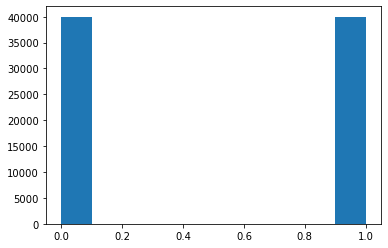

In [66]:
plt.hist(data['in-store'])
plt.show()

(array([16000.,     0.,     0., 20000.,     0.,     0., 18000.,     0.,
            0., 26000.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

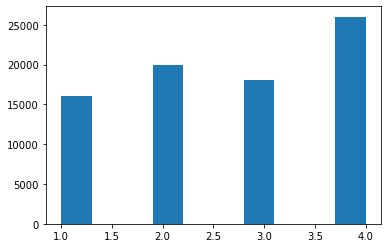

In [67]:
plt.hist(data['region']) 

In [68]:
data_sample = data.sample(100)

In [69]:
x = data_sample['age']
y = data_sample['amount']

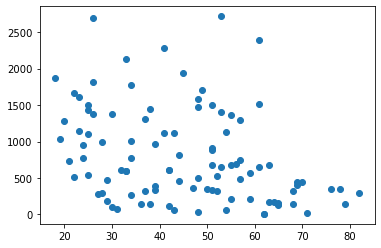

In [70]:
plt.scatter(x,y, marker='o')
plt.show()

In [71]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


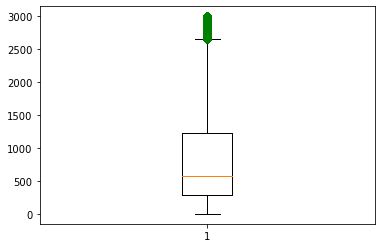

In [72]:
A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()

In [73]:
y1=data['items'].sum()
print(y1)
y2=data['amount'].sum()
print(y2)
z=y2/y1
print(z)


360398
66873573.57050001
185.55478546079615


In [74]:
k1=data.groupby('items')['amount'].mean()
print(k1)

items
1    825.386287
2    847.136035
3    836.694826
4    829.599524
5    834.303186
6    835.304430
7    830.138117
8    851.268593
Name: amount, dtype: float64


In [75]:
k2=data['amount'].mean()
print(k2)

835.9196696312501


In [76]:
corr_mat = data.corr()
print(corr_mat)
# there is barely any relationship between the number of items purchased and amount spent.
#There is some relationship between the age and amount. When age increases, the amount will decrease. 
# region and amount are highly correlated to each other. 

          in-store       age     items    amount    region
in-store  1.000000 -0.178256 -0.003954 -0.085474 -0.133114
age      -0.178256  1.000000  0.000679 -0.282089 -0.235446
items    -0.003954  0.000679  1.000000  0.000367 -0.001925
amount   -0.085474 -0.282089  0.000367  1.000000  0.403504
region   -0.133114 -0.235446 -0.001925  0.403504  1.000000


In [77]:
cov_mat = data.cov()
print(cov_mat)
# Region will affect amount as the covariance is quite large. 

           in-store          age     items         amount      region
in-store   0.250003    -1.400718 -0.004075     -30.825404   -0.074988
age       -1.400718   246.982562  0.021980   -3197.566591   -4.168901
items     -0.004075     0.021980  4.248703       0.545629   -0.004471
amount   -30.825404 -3197.566591  0.545629  520235.802331  327.903000
region    -0.074988    -4.168901 -0.004471     327.903000    1.269391


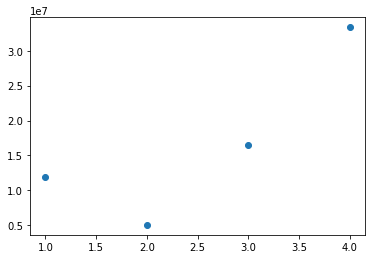

In [78]:
a=np.array(data['region'])
result=np.array([0, 0, 0 ,0])
z=np.array(data['amount'])
for i in range(0, z.size):
    result[a[i]-1]+=z[i] 
y=pd.Series(result)
x=pd.Series(np.array([1,2,3,4]))
plt.scatter(x,y, marker='o')
plt.show()
# customers in region 4 spend the most in total.
# customers in region 2 spend the least in total.


[1 2 3 4]
region
1     745.161491
2     252.109196
3     917.969637
4    1284.052012
Name: amount, dtype: float64


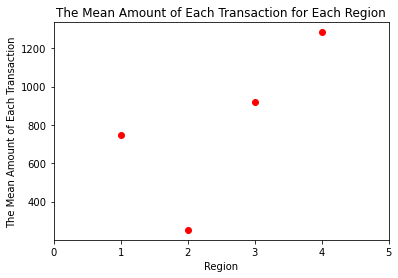

In [79]:
result=np.array([0, 0, 0 ,0])
y=data.groupby('region')['amount'].mean()
x=np.array(data['region'].drop_duplicates())
x.sort()
plt.scatter(x,y,marker='o',color="red")
plt.title("The Mean Amount of Each Transaction for Each Region")
plt.xlabel("Region")
plt.ylabel("The Mean Amount of Each Transaction")
plt.xlim(0,5)
#plt.show()
plt.savefig('my_figure1.png', transparent=True, bbox_inches='tight')
print(x)
print(y)
# customers in region 4 spend the most per transation.
# customers in region 2 spend the least per transation. 

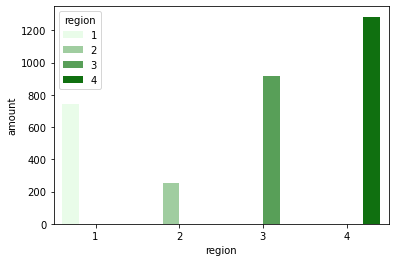

In [80]:
ax=sns.barplot(x='region',y=data['amount'], data=data,ci=None,hue='region', color='green')
plt.savefig('my_figure_region_barplot.png', transparent=True, bbox_inches='tight')

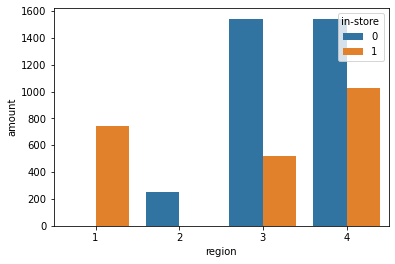

In [81]:
ax=sns.barplot(x='region',y='amount', data=data,ci=None,hue='in-store')
plt.savefig('my_figure_region_barplot.png', transparent=True, bbox_inches='tight')

In [82]:
data['Age-Disc'] = pd.cut(data['age'], bins=[17,39,62,85], labels=['under 40','Age 40-62','over 62'])
data.head()

,in-store,age,items,amount,region,Age-Disc
0,0,37,4,281.03,2,under 40
1,0,35,2,219.51,2,under 40
2,1,45,3,1525.70,4,Age 40-62
3,1,46,3,715.25,3,Age 40-62
4,1,33,4,1937.50,1,under 40


In [83]:
data_1=data.drop(columns='age')
data_1.head()

,in-store,items,amount,region,Age-Disc
0,0,4,281.03,2,under 40
1,0,2,219.51,2,under 40
2,1,3,1525.70,4,Age 40-62
3,1,3,715.25,3,Age 40-62
4,1,4,1937.50,1,under 40


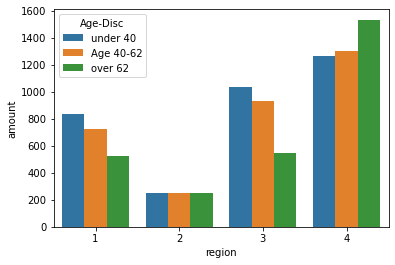

In [84]:
ax=sns.barplot(x='region',y='amount', data=data,ci=None,hue='Age-Disc')
plt.savefig('my_figure_region_age_barplot.png', transparent=True, bbox_inches='tight')

In [85]:
y3=data.groupby(['region','Age-Disc'])['age'].count().unstack()
print(y3)



Age-Disc  under 40  Age 40-62  over 62
region                                
1             6802       7131     2067
2             4036       8007     7957
3             6707       8750     2543
4            13660      12212      128


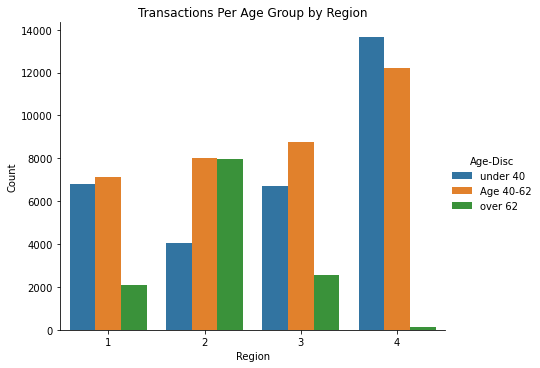

In [86]:
# Seaborn Cat Plot of Transactions Per Age Group by Region
g = sns.catplot('region', data=data, hue='Age-Disc', kind='count', aspect=1.25)
g.set_xlabels('Region')
g.set_ylabels('Count')
g.set(title='Transactions Per Age Group by Region');
plt.savefig('my_figure_age_region_catplot.png', transparent=True, bbox_inches='tight')

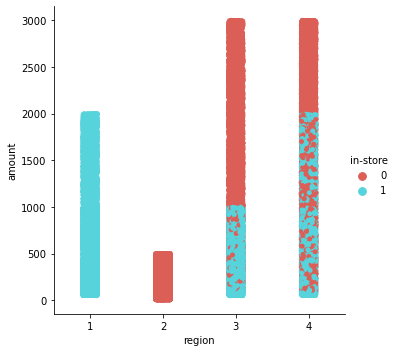

In [87]:
sns.catplot('region', 'amount', hue='in-store', data=data, palette='hls')

In [88]:
h=data.groupby('Age-Disc')['in-store'].count()
h.head()

Age-Disc
under 40     31205
Age 40-62    36100
over 62      12695
Name: in-store, dtype: int64

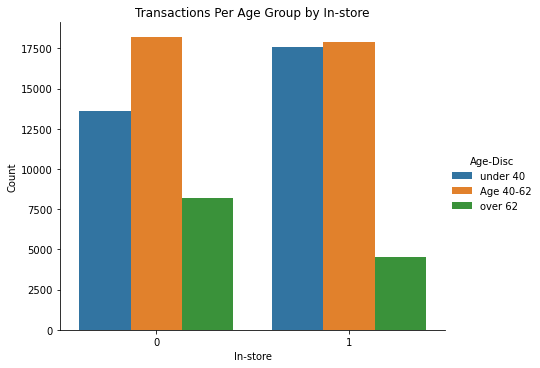

In [89]:
g2 = sns.catplot(x='in-store', data=data, hue='Age-Disc', kind='count', aspect=1.25)
g2.set_xlabels('In-store')
g2.set_ylabels('Count')
g2.set(title='Transactions Per Age Group by In-store');
plt.savefig('my_figure_age_in-store_catplot.png', transparent=True, bbox_inches='tight')

In [90]:
y=data.groupby('region')['amount'].sum().values
total=data['amount'].sum()
y
x=[]
for i in range(4):
    y[i]/total
    print(y[i]/total)
    x.append(y[i]/total)
print(x)
sum=0
for i in range(len(x)):
    sum += x[i]
print(sum)
    



0.1782854304986543
0.0753987510206016
0.24708494838518694
0.4992308700955609
[0.1782854304986543, 0.0753987510206016, 0.24708494838518694, 0.4992308700955609]
1.0000000000000038


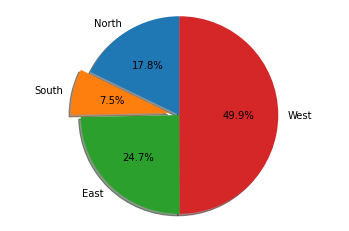

In [91]:
import matplotlib.pyplot as plt
labels='North','South','East','West'
sizes = [17.8,7.5,24.7,49.9]
explode=(0,0.1,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
#plt.show()
plt.savefig('my_figure_pie.png', transparent=True, bbox_inches='tight')

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
age
18    1444.543274
19    1325.550814
20    1272.460586
21    1267.709895
22    1296.252129
         ...     
81     249.391754
82     260.048755
83     260.606261
84     250.189170
85     243.312866
Name: amount, Length: 68, dtype: float64


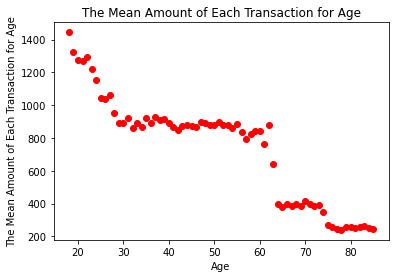

In [92]:
y=data.groupby('age')['amount'].mean()
x=np.array(data['age'].drop_duplicates())
x.sort()
plt.scatter(x,y,marker='o',color="red")
plt.title("The Mean Amount of Each Transaction for Age")
plt.xlabel("Age")
plt.ylabel("The Mean Amount of Each Transaction for Age")

#plt.show()
plt.savefig('my_figure5.png', transparent=True, bbox_inches='tight')
print(x)
print(y)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
age
18    4.860987
19    4.537012
20    4.549058
21    4.527215
22    4.599385
        ...   
81    4.487871
82    4.600000
83    4.605263
84    4.533512
85    4.421622
Name: items, Length: 68, dtype: float64


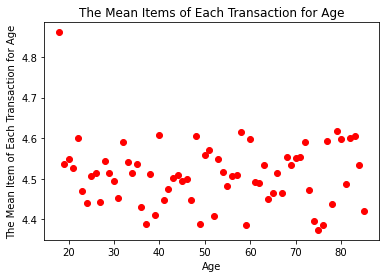

In [93]:
y=data.groupby('age')['items'].mean()
x=np.array(data['age'].drop_duplicates())
x.sort()
plt.scatter(x,y,marker='o',color="red")
plt.title("The Mean Items of Each Transaction for Age")
plt.xlabel("Age")
plt.ylabel("The Mean Item of Each Transaction for Age")

#plt.show()
plt.savefig('my_figure6.png', transparent=True, bbox_inches='tight')
print(x)
print(y)

[1 2 3 4 5 6 7 8]
items
1    825.386287
2    847.136035
3    836.694826
4    829.599524
5    834.303186
6    835.304430
7    830.138117
8    851.268593
Name: amount, dtype: float64


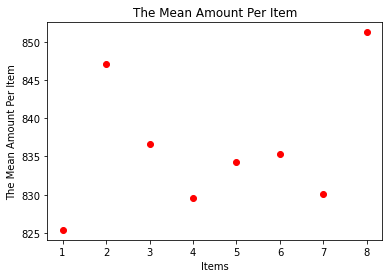

In [94]:
y=data.groupby('items')['amount'].mean()
x=np.array(data['items'].drop_duplicates())
x.sort()
plt.scatter(x,y,marker='o',color="red")
plt.title("The Mean Amount Per Item")
plt.xlabel("Items")
plt.ylabel("The Mean Amount Per Item")

#plt.show()
plt.savefig('my_figure7.png', transparent=True, bbox_inches='tight')
print(x)
print(y)

In [95]:
data.groupby('region')["amount"].count()

region
1    16000
2    20000
3    18000
4    26000
Name: amount, dtype: int64

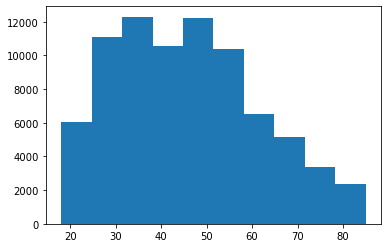

In [96]:
plt.hist(data['age'])
plt.show()

In [97]:
data.groupby('age')['age'].count()

age
18     223
19     743
20    1009
21     937
22     976
      ... 
81     371
82     385
83     380
84     373
85     185
Name: age, Length: 68, dtype: int64

In [98]:
data.age.describe()

count    80000.000000
mean        45.757925
std         15.715679
min         18.000000
25%         33.000000
50%         45.000000
75%         56.000000
max         85.000000
Name: age, dtype: float64

In [99]:
data.region.describe()

count    80000.000000
mean         2.675000
std          1.126672
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: region, dtype: float64

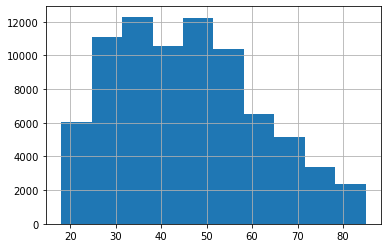

In [100]:
data['age'].hist(bins=10)

In [101]:
data.groupby('region')['in-store'].sum()

region
1    16000
2        0
3    10999
4    13001
Name: in-store, dtype: int64

In [102]:
data.groupby('region')['in-store'].count()

region
1    16000
2    20000
3    18000
4    26000
Name: in-store, dtype: int64

In [103]:
data.groupby('region')['in-store'].mean()

region
1    1.000000
2    0.000000
3    0.611056
4    0.500038
Name: in-store, dtype: float64

[1 2 3 4]
region
1    1.000000
2    0.000000
3    0.611056
4    0.500038
Name: in-store, dtype: float64


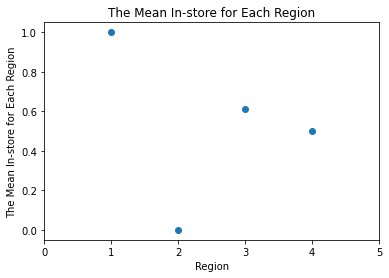

In [104]:
x=np.array(data['region'].drop_duplicates())
x.sort()
y = data.groupby('region')['in-store'].mean()
plt.scatter(x,y, marker='o')
plt.title("The Mean In-store for Each Region")
plt.xlabel("Region")
plt.ylabel("The Mean In-store for Each Region")
plt.xlim(0,5)
#plt.show()
plt.savefig('my_figure3.png', transparent=True, bbox_inches='tight')
print(x)
print(y)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
age
18    0.000000
19    0.388964
20    0.543112
21    0.596585
22    0.535861
        ...   
81    0.000000
82    0.000000
83    0.000000
84    0.000000
85    0.000000
Name: in-store, Length: 68, dtype: float64


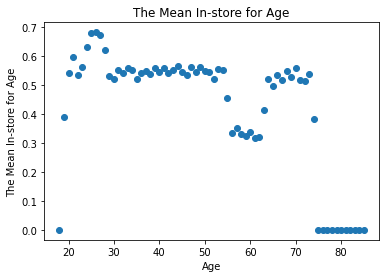

In [105]:
x=np.array(data['age'].drop_duplicates())
x.sort()
y = data.groupby('age')['in-store'].mean()
plt.scatter(x,y, marker='o')
plt.title("The Mean In-store for Age")
plt.xlabel("Age")
plt.ylabel("The Mean In-store for Age")

#plt.show()
plt.savefig('my_figure4.png', transparent=True, bbox_inches='tight')
print(x)
print(y)

In [106]:
data.groupby('region')['age'].mean()

region
1    43.703938
2    56.610350
3    45.646944
4    38.750731
Name: age, dtype: float64

In [107]:
x=np.array(data['region'].drop_duplicates())
x.sort()
y = data.groupby('region')['age'].mean()

[1 2 3 4]
region
1    43.703938
2    56.610350
3    45.646944
4    38.750731
Name: age, dtype: float64


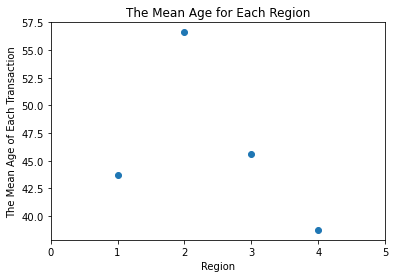

In [108]:
plt.scatter(x,y, marker='o')
plt.title("The Mean Age for Each Region")
plt.xlabel("Region")
plt.ylabel("The Mean Age of Each Transaction")
plt.xlim(0,5)
#plt.show()
plt.savefig('my_figure2.png', transparent=True, bbox_inches='tight')
print(x)
print(y)

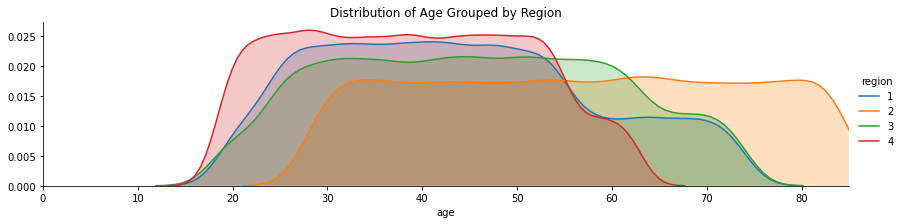

In [109]:
fig = sns.FacetGrid(data, hue='region', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Region')
fig.add_legend()

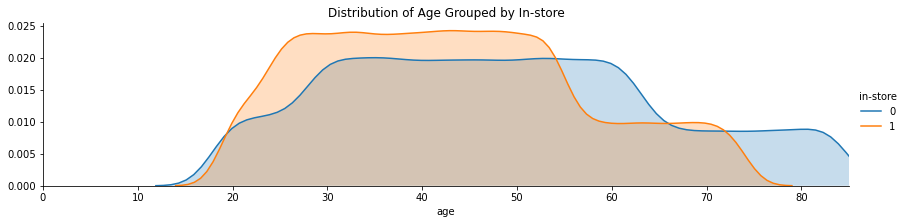

In [110]:
fig = sns.FacetGrid(data, hue='in-store', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by In-store')
fig.add_legend()